# Stanford Stats 191

## Introduction

This is a re-creation of the Stanford Stats 191 course (see https://web.stanford.edu/class/stats191/), using Python eco-system tools, instead of R. This is lecture "Interactions and qualitative variables", Part 2

## Initial Notebook Setup

```watermark ``` documents the current Python and package environment, ```black``` is my preferred Python formatter

In [54]:
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [55]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [56]:
%matplotlib inline

In [57]:
import pandas as pd
import numpy as np
import seaborn as sn

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.formula.api import rlm
import statsmodels.api as sm


import warnings

------
## Load and Explore Example Dataset


|Variable|	Description|
|--|--|
|TEST|	Job aptitude test score|
|MINORITY|	1 if applicant could be considered minority, 0 otherwise|
|PERF	|Job performance evaluation|



In [58]:
data = pd.read_csv('../data/jobtest.txt', sep='\t')

# sort the Test Score data to make graphic easier

data = data.sort_values(by='TEST').copy()

In [59]:
data.head()

,TEST,MINORITY,JPERF
0,0.28,1,1.83
18,0.42,0,3.85
12,0.45,0,1.39
17,0.72,0,1.90
1,0.97,1,4.59


In [60]:
data['MINORITY'].unique()

array([1, 0], dtype=int64)

We change the color and symbol used to distinguish observations with different Minority status (we only need two different colors and two different marker symbols)

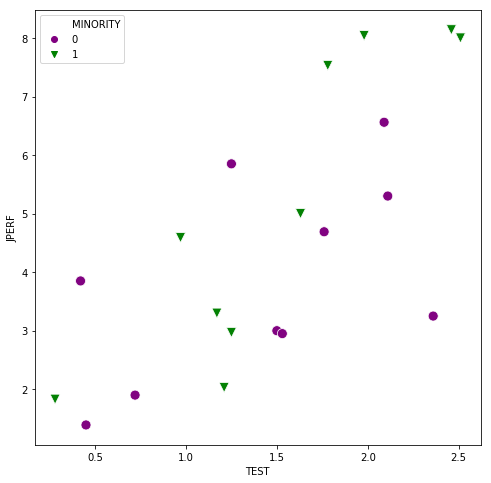

In [61]:
fig, ax = plt.subplots(figsize=(8, 8))
sn.scatterplot(
    'TEST',
    'JPERF',
    data=data,
    hue='MINORITY',
    ax=ax,
    alpha=0.99,
    s=100,
    markers=['o', 'v'],
    palette=['purple', 'green'],
    style='MINORITY',
)

----
## Develop Models
  Our general model has the equation as below

$$JPERF_i = \beta_0 + \beta_1 TEST_i + \beta_2 MINORITY_i + \beta_3 MINORITY_i * TEST_i + \varepsilon_i.$$



### Model 1, TEST Only

First, we create a model where Job Performance depends only on the Test Scores  (equivalent to beta-2, beta-3 = 0 in the equation above)

$$JPERF_i = \beta_0 + \beta_1 TEST_i  + \varepsilon_i.$$

In [62]:
res1 = ols('JPERF ~ TEST', data=data).fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  JPERF   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     19.25
Date:                Thu, 26 Mar 2020   Prob (F-statistic):           0.000356
Time:                        16:22:17   Log-Likelihood:                -36.614
No. Observations:                  20   AIC:                             77.23
Df Residuals:                      18   BIC:                             79.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0350      0.868      1.192      0.249      -0.789       2.859
TEST           2.3605      0.538      4.387      0.000       1.230       3.491
==============================================================================
Omnibus:                        0.324   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.483
Skew:                          -0.186   Prob(JB):                        0.785
Kurtosis:                       2.336   Cond. No.                         5.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Display the line of best fit (not looking as if this model is wonderful!)

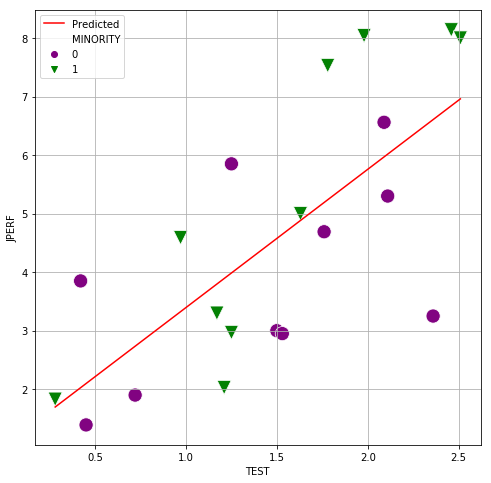

In [63]:
fig, ax = plt.subplots(figsize=(8, 8))
sn.scatterplot(
    'TEST',
    'JPERF',
    data=data,
    hue='MINORITY',
    ax=ax,
    alpha=0.99,
    s=200,
    markers=['o', 'v'],
    palette=['purple', 'green'],
    style='MINORITY',
)

y1 = res1.predict()
ax.plot(data['TEST'], y1, 'r-', label='Predicted')
ax.grid()
ax.legend(loc='best')

Display the residuals.  At least they appear to have constant variance

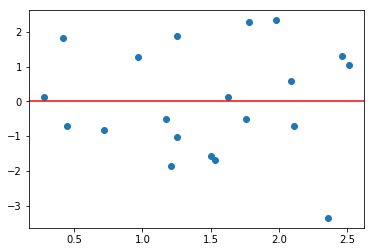

In [64]:
plt.plot(data['TEST'], res1.resid, 'o')
plt.axhline(0, color='r')

### Model 2, TEST and Minority Status

We now build a model where Job Performamnce depends upon Test Scores  *and* Minority Status.  This maodel says we have the same slope of the ```JPERF``` - ```TEST``` line for each Minority Status (but each Minority Status line has a different intercept)
This is equivalent to setting beta-3 = 0 in our general equation above

$$JPERF_i = \beta_0 + \beta_1 TEST_i + \beta_2 MINORITY_i +  \varepsilon_i.$$

In [65]:
res2 = ols('JPERF ~ TEST + MINORITY', data=data).fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  JPERF   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     11.38
Date:                Thu, 26 Mar 2020   Prob (F-statistic):           0.000731
Time:                        16:22:17   Log-Likelihood:                -35.390
No. Observations:                  20   AIC:                             76.78
Df Residuals:                      17   BIC:                             79.77
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6120      0.887      0.690      0.500      -1.260       2.483
TEST           2.2988      0.522      4.400      0.000       1.197       3.401
MINORITY       1.0276      0.691      1.487      0.155      -0.430       2.485
==============================================================================
Omnibus:                        0.251   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.882   Jarque-Bera (JB):                0.437
Skew:                          -0.059   Prob(JB):                        0.804
Kurtosis:                       2.286   Cond. No.                         5.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



Plotting the two lines our model gives us look OK, but the residuals plot does not look to be significantly better 

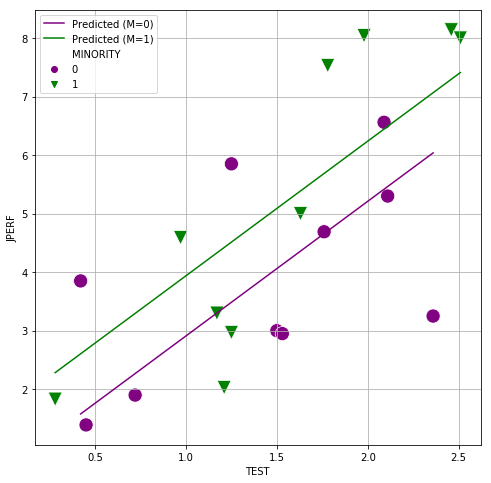

In [66]:
fig, ax = plt.subplots(figsize=(8, 8))
sn.scatterplot(
    'TEST',
    'JPERF',
    data=data,
    hue='MINORITY',
    ax=ax,
    alpha=0.99,
    s=200,
    markers=['o', 'v'],
    palette=['purple', 'green'],
    style='MINORITY',
)

data['PREDICT'] = res2.predict()
mask0 = data['MINORITY'] == 0
mask1 = data['MINORITY'] == 1

y1 = data[mask0]['PREDICT']
y2 = data[mask1]['PREDICT']
ax.plot(
    data[mask0]['TEST'],
    y1,
    color='purple',
    label='Predicted (M=0)',
)
ax.plot(
    data[mask1]['TEST'], y2, 'g-', label='Predicted (M=1)'
)
ax.grid()
ax.legend(loc='best')

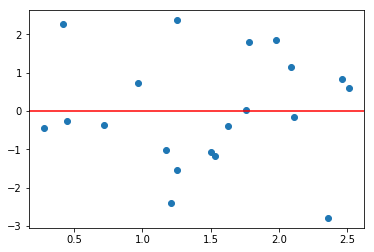

In [67]:
plt.plot(data['TEST'], res2.resid, 'o')
plt.axhline(0, color='r')

-----
### Model 3, TEST with MINORITY Interaction

In our third model, we allow each Minority Status group to have diffent slope but same intercept in the ```TEST``` - ```JPERF``` line, equivalent to beta-2 = 0

$$JPERF_i = \beta_0 + \beta_1 TEST_i  + \beta_3 MINORITY_i * TEST_i + \varepsilon_i.$$

In [68]:
res3 = ols('JPERF ~ TEST + TEST:MINORITY', data=data).fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  JPERF   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     14.59
Date:                Thu, 26 Mar 2020   Prob (F-statistic):           0.000204
Time:                        16:22:18   Log-Likelihood:                -33.891
No. Observations:                  20   AIC:                             73.78
Df Residuals:                      17   BIC:                             76.77
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.1211      0.780      1.437      0.169      -0.525       2.768
TEST              1.8276      0.536      3.412      0.003       0.698       2.958
TEST:MINORITY     0.9161      0.397      2.306      0.034       0.078       1.754
==============================================================================
Omnibus:                        0.388   Durbin-Watson:                   1.781
Prob(Omnibus):                  0.823   Jarque-Bera (JB):                0.514
Skew:                           0.050   Prob(JB):                        0.773
Kurtosis:                       2.221   Cond. No.                         5.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Subjectively, this is a better model (especially for Minority Status = 0 observations).  However, the beauty of statistics is that we don't have to rely on subjective assessment!

The code below add the ```TEST``` = 0 point to each line, to show they have the same intercept

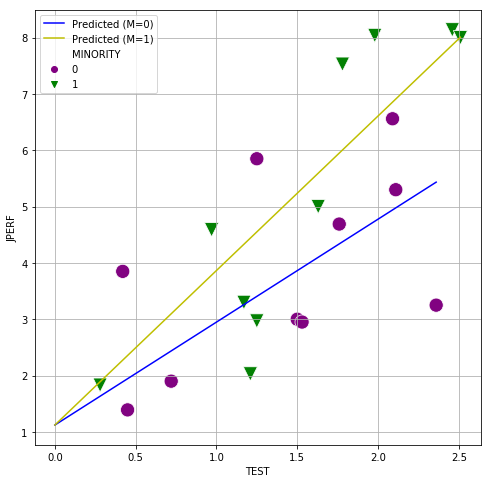

In [69]:
fig, ax = plt.subplots(figsize=(8, 8))
sn.scatterplot(
    'TEST',
    'JPERF',
    data=data,
    hue='MINORITY',
    ax=ax,
    alpha=0.99,
    s=200,
    markers=['o', 'v'],
    palette=['purple', 'green'],
    style='MINORITY',
)

data['PREDICT'] = res3.predict()
mask0 = data['MINORITY'] == 0
mask1 = data['MINORITY'] == 1

y1 = data[mask0]['PREDICT']
y2 = data[mask1]['PREDICT']
ax.plot(
    [0] + list(data[mask0]['TEST']),
    [res3.params['Intercept']] + list(y1),
    'b-',
    label='Predicted (M=0)',
)
ax.plot(
    [0] + list(data[mask1]['TEST']),
    [res3.params['Intercept']] + list(y2),
    'y-',
    label='Predicted (M=1)',
)
ax.grid()
ax.legend(loc='best')

We plot the residuals

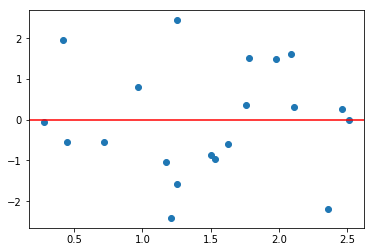

In [70]:
plt.plot(data['TEST'], res3.resid, 'o')
plt.axhline(0, color='r')

-----
### Model 4, All Possible Contributions to Linear Model

Our last model has no constraints on the beta values

$$JPERF_i = \beta_0 + \beta_1 TEST_i + \beta_2 MINORITY_i + \beta_3 MINORITY_i * TEST_i + \varepsilon_i.$$

In [71]:
#
# * has special meaning in ```ols``` formulas

res4 = ols('JPERF ~ TEST * MINORITY', data=data).fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  JPERF   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     10.55
Date:                Thu, 26 Mar 2020   Prob (F-statistic):           0.000451
Time:                        16:22:18   Log-Likelihood:                -32.971
No. Observations:                  20   AIC:                             73.94
Df Residuals:                      16   BIC:                             77.92
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.0103      1.050      1.914      0.074      -0.216       4.236
TEST              1.3134      0.670      1.959      0.068      -0.108       2.735
MINORITY         -1.9132      1.540     -1.242      0.232      -5.179       1.352
TEST:MINORITY     1.9975      0.954      2.093      0.053      -0.026       4.021
==============================================================================
Omnibus:                        3.377   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.185   Jarque-Bera (JB):                1.330
Skew:                           0.120   Prob(JB):                        0.514
Kurtosis:                       1.760   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

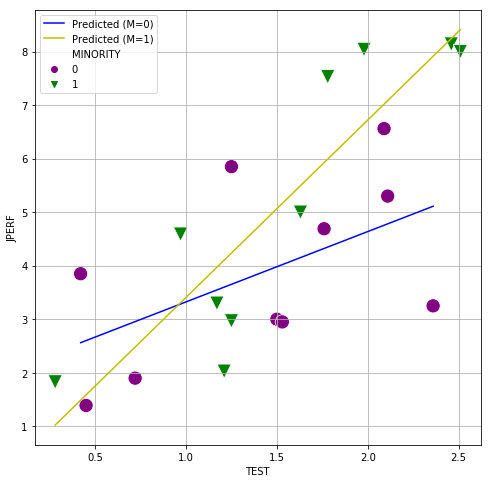

In [72]:
fig, ax = plt.subplots(figsize=(8, 8))
sn.scatterplot(
    'TEST',
    'JPERF',
    data=data,
    hue='MINORITY',
    ax=ax,
    alpha=0.99,
    s=200,
    markers=['o', 'v'],
    palette=['purple', 'green'],
    style='MINORITY',
)

data['PREDICT'] = res4.predict()
mask0 = data['MINORITY'] == 0
mask1 = data['MINORITY'] == 1

y1 = data[mask0]['PREDICT']
y2 = data[mask1]['PREDICT']
ax.plot(
    list(data[mask0]['TEST']),
    list(y1),
    'b-',
    label='Predicted (M=0)',
)
ax.plot(
    list(data[mask1]['TEST']),
    list(y2),
    'y-',
    label='Predicted (M=1)',
)
ax.grid()
ax.legend(loc='best')

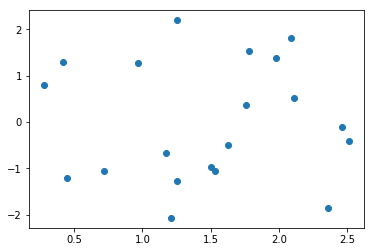

In [73]:
plt.plot(data['TEST'], res4.resid, 'o')

It is interesting to see  the Mean Square Error in the Residuals for each model

In [74]:
res = [res1, res2, res3, res4]

Text(0, 0.5, 'Mean Square Residuals')

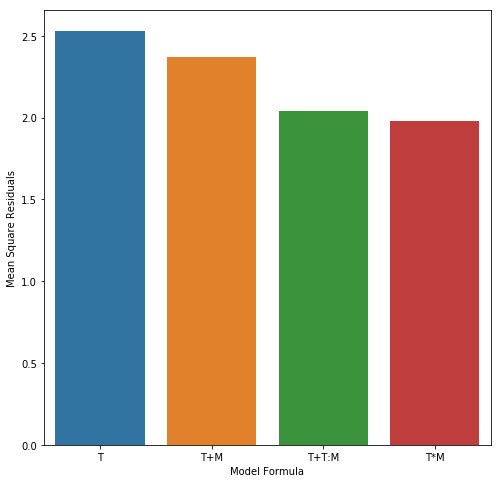

In [75]:
fig, ax = plt.subplots(figsize=(8, 8))
sn.barplot(
    ['T', 'T+M', 'T+T:M', 'T*M'],
    [a.mse_resid for a in res],
    ax=ax,
)
ax.set_xlabel('Model Formula')
ax.set_ylabel('Mean Square Residuals')

-----
## Analysis of Variance

We now compare each model against another,  to see if there is a significantly better explanation for the variance

### TEST vs TEST * MINORITY

Not significant at the 5% level

In [76]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    anv = sm.stats.anova_lm(res1, res4)
# end with
anv

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,18.0,45.568297,0.0,NaN,NaN,NaN
1,16.0,31.655473,2.0,13.912824,3.516061,0.054236


### TEST vs TEST + MINORITY

Not significant

In [77]:
sm.stats.anova_lm(res1, res2)

D:\Anaconda3\envs\ac5-py37\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\Anaconda3\envs\ac5-py37\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\Anaconda3\envs\ac5-py37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,18.0,45.568297,0.0,NaN,NaN,NaN
1,17.0,40.321546,1.0,5.246751,2.212087,0.155246


### TEST + TEST:MINORITY vs TEST * MINORITY

Not significant

In [78]:
sm.stats.anova_lm(res3, res4)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,17.0,34.707653,0.0,NaN,NaN,NaN
1,16.0,31.655473,1.0,3.05218,1.542699,0.232115


### TEST vs TEST + TEST:MINORITY

Significant at the 5% level

In [79]:
sm.stats.anova_lm(res1, res3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,18.0,45.568297,0.0,NaN,NaN,NaN
1,17.0,34.707653,1.0,10.860644,5.319603,0.033949


### TEST + MINORITY vs TEST:MINORITY

Not significant at the 5% level

In [80]:
sm.stats.anova_lm(res2, res4)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,17.0,40.321546,0.0,NaN,NaN,NaN
1,16.0,31.655473,1.0,8.666073,4.380196,0.05265


Finally we plot the residuals of all the models together

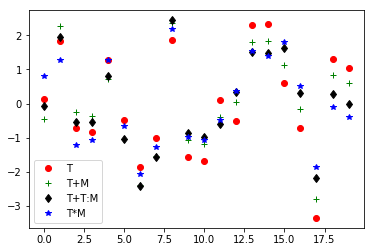

In [81]:
# ['T', 'T+M', 'T+T:M', 'T*M']

_ = plt.plot(range(len(data)), res1.resid, 'ro', label='T')
_ = plt.plot(
    range(len(data)), res2.resid, 'g+', label='T+M'
)
_ = plt.plot(
    range(len(data)), res3.resid, 'kd', label='T+T:M'
)
_ = plt.plot(
    range(len(data)), res4.resid, 'b*', label='T*M'
)
_ = plt.legend(loc='best')

## Environment

In [82]:
%watermark -h -iv
%watermark

pandas      1.0.0
numpy       1.15.4
matplotlib  3.0.2
scipy       1.1.0
statsmodels 0.9.0
seaborn     0.9.0
host name: DESKTOP-SODFUN6
2020-03-26T16:22:20+10:00

CPython 3.7.1
IPython 7.2.0

compiler   : MSC v.1915 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 94 Stepping 3, GenuineIntel
CPU cores  : 8
interpreter: 64bit
